## Drawing Bloch Sphere

In [1]:
def CIRCUITO_NOT():
    from qiskit import QuantumRegister, QuantumCircuit;
    Q  = QuantumRegister(  1, name = 'm');
#   C  = ClassicalRegister(1, name = 'c');
#   QC = QuantumCircuit(Q, C, name = "NOT");
    QC = QuantumCircuit(Q, name = "NOT");
    QC.x(Q);
#   QC.measure(Q,C);
    print('CIRCUITO_NOT(): FUNCIONA');
    return QC;

def PLOT_STATE(QC):
    F_NAME = '\'PLOT_STATE()\'';
    from qiskit.tools.visualization import plot_state_city,        iplot_state_city;
    from qiskit.tools.visualization import plot_bloch_multivector, iplot_bloch_multivector;
    from qiskit                     import execute, Aer;
#-----------------------------------------------------------------------
    BACKEND = Aer.get_backend('unitary_simulator') # the device to run on
    EXP    =  execute(QC, BACKEND);
    RESULT =  EXP.result();
    UNITARY = RESULT.get_unitary(QC, decimals=3);
    print('U = ', UNITARY);
#-----------------------------------------------------------------------
    BACKEND = Aer.get_backend('statevector_simulator') # the device to run on
    EXP    =  execute(QC, BACKEND, shots=1);
    RESULT =  EXP.result();
    PSI    =  RESULT.get_statevector(QC, decimals = 3);
    print('|PSI> = ', PSI);
#---------------
    print('PLOT_STATE_CITY():');
    display(  plot_state_city(PSI) );
#   display( iplot_state_city(PSI) );
#---------------
    print('PLOT_BLOCH_MULTIVECTOR():');
    display(  plot_bloch_multivector(PSI) );
#   display( iplot_bloch_multivector(PSI) );
#-----------------------------------------------------------------------
    print(' ---------- FIM DA FUNCAO %s---------- '% F_NAME);
    return None;

CIRCUITO_NOT(): FUNCIONA


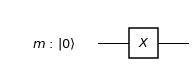

In [3]:
QC = CIRCUITO_NOT();
QC.draw(output = 'mpl')

U =  [[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]
|PSI> =  [0.+0.j 1.+0.j]
PLOT_STATE_CITY():


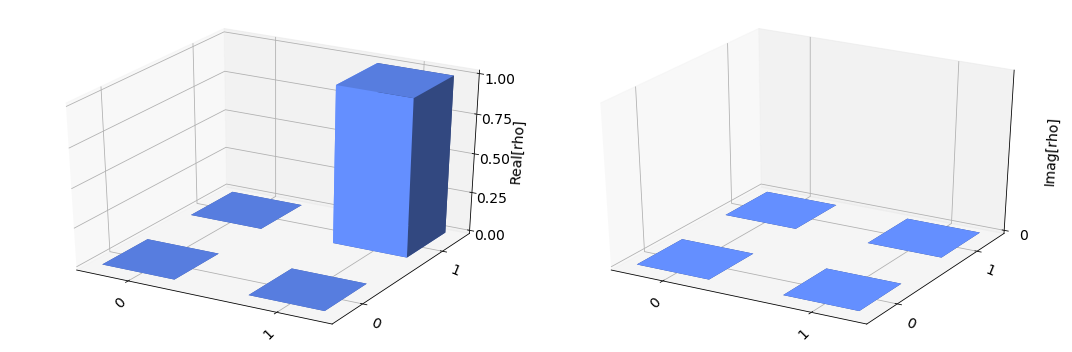

PLOT_BLOCH_MULTIVECTOR():


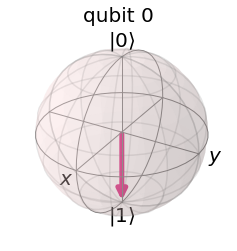

 ---------- FIM DA FUNCAO 'PLOT_STATE()'---------- 


In [3]:
PLOT_STATE(QC);

In [4]:
#--------------------------------------
# FUNCTION THAT ASSEMBLY THE DEUTSCH CIRCUIT
# USING 1 CLASSIC REGISTRATION ON THE METER
#--------------------------------------

def TELEPORT():
    from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit;
#-----------------
    Q  = QuantumRegister(3, name = 'm');
    C  = ClassicalRegister(3, name = 'c');
    QC = QuantumCircuit(Q, C, name = "DEUTSCH_1");
#-----------------
    QC.h(Q[1]);
    QC.cx(Q[1], Q[2]);
    QC.cx(Q[0], Q[1]);
    QC.h(Q[0]);
    QC.barrier();
    QC.cx(Q[1], Q[2]);
    QC.h(Q[2]);
    QC.cx(Q[0], Q[2]);
    QC.h(Q[2]);
    QC.barrier();
    QC.measure(Q[0],C[0]);
    QC.measure(Q[1],C[1]);
    QC.measure(Q[2],C[2]);
    print(' TELEPORT(): FUNCIONA');
    return QC;

In [5]:
QCteleport = TELEPORT();

 TELEPORT(): FUNCIONA


In [6]:
print(QCteleport)

                       ┌───┐ ░                      ░ ┌─┐      
m_0: |0>────────────■──┤ H ├─░─────────────■────────░─┤M├──────
        ┌───┐     ┌─┴─┐└───┘ ░             │        ░ └╥┘┌─┐   
m_1: |0>┤ H ├──■──┤ X ├──────░───■─────────┼────────░──╫─┤M├───
        └───┘┌─┴─┐└───┘      ░ ┌─┴─┐┌───┐┌─┴─┐┌───┐ ░  ║ └╥┘┌─┐
m_2: |0>─────┤ X ├───────────░─┤ X ├┤ H ├┤ X ├┤ H ├─░──╫──╫─┤M├
             └───┘           ░ └───┘└───┘└───┘└───┘ ░  ║  ║ └╥┘
 c_0: 0 ═══════════════════════════════════════════════╩══╬══╬═
                                                          ║  ║ 
 c_1: 0 ══════════════════════════════════════════════════╩══╬═
                                                             ║ 
 c_2: 0 ═════════════════════════════════════════════════════╩═
                                                               


Densenhando de uma forma mais bonitinha:

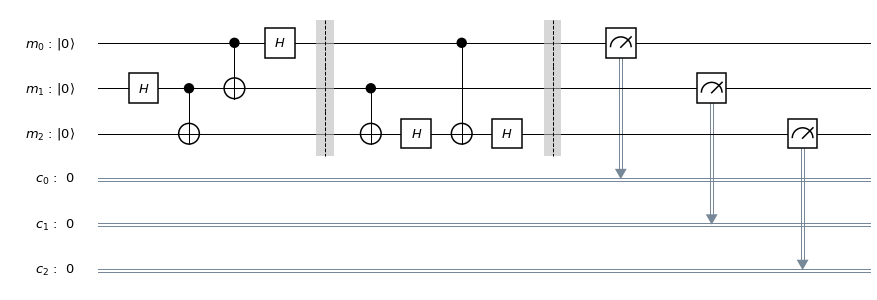

In [7]:
QCteleport.draw(output='mpl')

## Function To Draw Cute Quantum Circuit

In [21]:
def DRAWER_CIRCUIT(QCteleport):
    F_NAME = '\'DRAWER_CIRCUIT()\'';
#-----------------------------------------------------------------------
#   from qiskit.tools.visualization import circuit_drawer;
#-----------------------------------------------------------------------
    STYLE = {
  'compress':         True,
  'showindex':        True,
  'usepiformat':      True,
  'cregbundle':       True,  # If set True bundle classical registers
  'latexdrawerstyle': False, # When set to True enable latex mode which will draw gates like the latex output modes. COLOCQUEI FALSE PORQUE TEVE PROBLEMA COM A PORTA CU3.
#----------
  'fontsize':         13,  # The font size to use for text. Defaults to 13
  'subfontsize':      11,  # The font size to use for subtext. Defaults to 8
  'dpi':              150, # The DPI to use for the output image. Defaults to 150
  'fold':             45,  # The number of circuit elements to fold the circuit at. Defaults to 20
  'creglinestyle':   'doublet', # The style of line to use for classical registers. Choices are 'solid', 'doublet', or any valid matplotlib linestyle kwarg value. Defaults to doublet
#  figwidth (int):    The maximum width (in inches) for the output figure.
#----------
  'backgroundcolor':  'white',
  'textcolor':        '#000000', # The color code to use for text. Defaults to '#000000'
  'subtextcolor':     '#000000', # The color code to use for subtext. Defaults to '#000000'
  'linecolor':        '#000000', # The color code to use for lines. Defaults to '#000000'
  'creglinecolor':    'blue',    # The color code to use for classical register lines '#778899'
  'gatetextcolor':    '#000000', # The color code to use for gate text '#000000'
  'gatefacecolor':    '#ffffff', # The color code to use for gates. Defaults to '#ffffff'
  'barrierfacecolor': '#bdbdbd', # The color code to use for barriers. Defaults to '#bdbdbd'
  'displaytext':  { # <-- displaytext (dict): A dictionary of the text to use for each element type in the output visualization. The default values are:
      'id': 'id', 'u0': '\mathtt{U}_0', 'u1': '\mathtt{U_1}', 'u2': '\mathtt{U_2}', 'u3': '\mathtt{U_3}', 'x': '\mathtt{X}', 
      'y': 'Y', 'z': 'Z', 'h': '\mathtt{H}', 's': '\mathtt{S}', 'sdg': '\mathtt{S}^{\dagger}', 't': 'T',
      'tdg': '\mathtt{T}^{\dagger}', 'rx': 'R_x', 'ry': 'R_y', 'rz': 'R_z', 'reset': '\left|0rightrangle' },
  "displaycolor": { # Taken from qx_color_scheme() in _circuit_visualization.py (https://github.com/Qiskit/qiskit-terra/blob/master/qiskit/tools/visualization/_circuit_visualization.py)
            "id": "#ffca64",  "u0": "#f69458", "u1":  "#f69458", "u2": "#f69458",
            "u3": "#f69458",  "x":  "#a6ce38", "y":   "#a6ce38", "z":  "#a6ce38",
            "h": "#00bff2",   "s":  "#00bff2", "sdg": "#00bff2", "t":  "#ff6666",
            "tdg": "#ff6666", "rx": "#ffca64", "ry":  "#ffca64", "rz": "#ffca64",
            "reset": "#d7ddda", "target": "#00bff2",  "meas": "#f070aa"},
            #"margin": [5, 0.0, 0.0, 0.3],
    }
#-----------------------------------------------------------------------
    REVERSE_BITS  = False;
    PLOT_BARRIERS = True;
    SCALE = 0.6;
#------------------------------
#   FIG = QC.draw(output='latex', style=STYLE, reverse_bits=REVERSE_BITS, plot_barriers=PLOT_BARRIERS, scale=SCALE); # <-- USANDO LATEX
#   FIG = QC.draw(output='text',  style=STYLE, reverse_bits=REVERSE_BITS, plot_barriers=PLOT_BARRIERS, scale=SCALE); # <-- COMO TEXTO
    FIG = QCteleport.draw(output='mpl',   style=STYLE, reverse_bits=REVERSE_BITS, plot_barriers=PLOT_BARRIERS, scale=SCALE); # <-- USANDO MATPLOTLIB
#------------------------
#   print(QC); # <-- COMO TEXTO, ASSIM FUNCIONA SEM SUAR display
#-----------------------------------------------------------------------
    print(' ---------- FIM DA FUNCAO %s---------- '% F_NAME);
    display(FIG);
    return None;


 ---------- FIM DA FUNCAO 'DRAWER_CIRCUIT()'---------- 


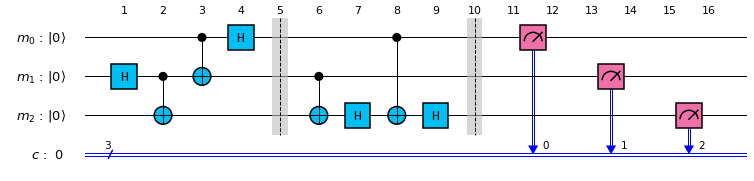

In [22]:
DRAWER_CIRCUIT(QCteleport)

## Simulating the Circuit on a Local Machine

In [21]:
#------------------------------------------------------------------------
# FUNCTION THAT PERFORMS THE CIRCUIT ON THE LOCAL MACHINE:
#------------------------------------------------------------------------
def SIMULADOR_LOCAL(QC, N_SHOTS, BACKEND_NAME):
    from qiskit  import Aer;
    from qiskit  import execute;
#--------------
    F_NAME = '\'SIMULADOR_LOCAL()\'';
    BACKEND = Aer.get_backend(BACKEND_NAME);
#-----------------------------------------------------------------------
    EXP = execute(QC, BACKEND, shots=N_SHOTS);
    RESULT = EXP.result();
    print(' RESULTS:');
#   print('   EXP.result():', RESULT); # <-- PRINTS A LOT OF THINGS
    print('   backend_name:', RESULT.backend_name, end =' |');
    print('   status:',       RESULT.status, end =' |');
    print('   success:',      RESULT.success);
#   print('   data:',         RESULT.data); <-- PRINTS A LOT OF THINGS
    print('   get_counts():', RESULT.get_counts() ); # print(' get_data() = ',   result.get_data(qc) );
#-----------------------------------------------------------------------
    print(' ---------- FIM DA FUNCAO %s---------- '% F_NAME);
    return RESULT.get_counts();

In [22]:
#------------------------------------------------------------------------
# FUNCTION TO CREATE THE HISTOGRAM:
#------------------------------------------------------------------------
def PLOT_HISTOGRAMS( DATA, LEGEND ):
    from qiskit.tools.visualization import plot_histogram, iplot_histogram;
    BAR_LABELS = True; # <-- MOSTRAR AS PROBABILIDADES ACIMA DAS BARRAS DO HISTOGRAMA
    HIST = plot_histogram( DATA, legend = LEGEND, bar_labels = BAR_LABELS, figsize = (15, 4) );
    display(HIST);
    return None;

 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'001': 2044, '000': 1987, '010': 2066, '011': 2095}
 ---------- FIM DA FUNCAO 'SIMULADOR_LOCAL()'---------- 


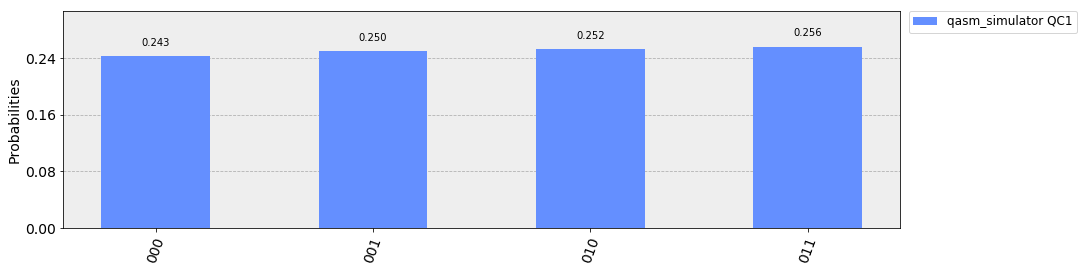

In [23]:
N_SHOTS = 2**(13);
BACKEND_NAME = "qasm_simulator";

DADOS_1 = SIMULADOR_LOCAL(QCteleport, N_SHOTS, BACKEND_NAME);
#DADOS_2 = SIMULADOR_LOCAL(QC2, N_SHOTS, BACKEND_NAME);

PLOT_HISTOGRAMS( [DADOS_1],  [BACKEND_NAME+' QC1'] );
#PLOT_HISTOGRAMS( [DADOS_2],  [BACKEND_NAME+' QC2'] );

## Simulating the Circuit on the Remote Machine at IBM Qiskit

In [13]:
#------------------------------------------------------------------------
# FUNCAO PARA SE REGISTRAR NA IBM:
#------------------------------------------------------------------------
def CHIP_REGISTER():
    from qiskit import IBMQ;
    from qiskit.tools.monitor import backend_overview;
#-----------------------------------------------------------------------
#   You can get the API token from https://quantumexperience.ng.bluemix.net/qx/account,
    QX_TOKEN = "7f34af94cd8e670eea5e2bc4e809b21bd2d9217ab1cf27b2e813a7618f7825e6701e1bb188b8e713414f9eb773a342ffe0d434d88f44579e532dc10daf3b1ddb";
    QX_URL   = "https://quantumexperience.ng.bluemix.net/api";
#-----------------------------------------------------------------------
   # try:
   # IBMQ.enable_account( QX_TOKEN );
    IBMQ.save_account(QX_TOKEN); # <-- NEW METHOD https://github.com/Qiskit/qiskit-ibmq-provider
       # print(' CHIP_REGISTER() DIZ:\n REGISTER OK');
  #  except:
   #     print(' CHIP_REGISTER() DIZ:\n Something went wrong.\n Did you enter a correct token?');
    return None;
#-----------------------------------------------------------------------
CHIP_REGISTER();

In [15]:
# GETTING A LOOK AT THE BACKENDS:
def CHECK_REMOTE_BACKENDS():
    from qiskit import IBMQ;
    from qiskit.tools.monitor import backend_overview;

    print('ARTIFICIAL:', IBMQ.backends( local = False, simulator = True) );
    print('CHIP REAL :', IBMQ.backends( local = False, simulator = False) );

    print("BACKEND_OVERVIEW():");
    backend_overview();

    return None;

CHECK_REMOTE_BACKENDS();

/home/felipe/.local/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:547: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)


ARTIFICIAL: [<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>]
CHIP REAL : [<IBMQBackend('ibmqx4') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>]
BACKEND_OVERVIEW():


/home/felipe/.local/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:547: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)
/home/felipe/.local/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:547: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)


ibmq_16_melbourne           ibmqx2                       ibmqx4
-----------------           ------                       ------
Num. Qubits:  14            Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 0             Pending Jobs: 0              Pending Jobs: 67
Least busy:   True          Least busy:   False          Least busy:   False
Operational:  True          Operational:  True           Operational:  True
Avg. T1:      55.8          Avg. T1:      64.0           Avg. T1:      42.9
Avg. T2:      69.5          Avg. T2:      49.0           Avg. T2:      16.8





In [16]:
#------------------------------------------------------------------------
# FUNCTION THAT PERFORMS THE CIRCUIT ON THE REMOTE MACHINE:
#------------------------------------------------------------------------
def SIMULADOR_REMOTO(QC, N_SHOTS, BACKEND_NAME):
    from qiskit               import IBMQ;
    from qiskit               import execute;
    from qiskit.tools.monitor import job_monitor;
#--------------
    F_NAME = '\'SIMULADOR_REMOTO()\'';
    BACKEND = IBMQ.get_backend(BACKEND_NAME);
# NEW METHOD:
#   PROVIDER = IBMQ.load_account();
#   PROVIDER = IBMQ.enable_account('MY_API_TOKEN');
#   BACKEND  = PROVIDER.get_backend(BACKEND_NAME);
#--------------
    STATUS  = BACKEND.status();
    if( STATUS.operational == False ):
        print(' FUNCAO %s DIZ:'% F_NAME );
        print(' ESTE BACKEND NAO ESTA OPERACIONAL NO MOMENTO, VEJA:');
        print("    STATUS.operational =",  STATUS);
        print(' ENCERRANDO'); return None;
#-----------------------------------------------------------------------
    EXP = execute(QC, BACKEND, shots=N_SHOTS);
    job_monitor(EXP, interval = 5);

    RESULT = EXP.result();
    print(' RESULTS:');
#   print('   EXP.result():', RESULT); # <-- PRINTS A LOT OF THINGS
    print('   backend_name:', RESULT.backend_name, end =' |');
    print('   status:',       RESULT.status, end =' |');
    print('   success:',      RESULT.success);
#   print('   data:',         RESULT.data); #<-- PRINTS A LOT OF THINGS
    print('   get_counts():', RESULT.get_counts() ); # print(' get_data() = ',   result.get_data(qc) );
#-----------------------------------------------------------------------
    print(' ---------- FIM DA FUNCAO %s---------- '% F_NAME);
    return RESULT.get_counts();

/home/felipe/.local/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:594: DeprecationWarning: IBMQ.get_backend() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.get_backend("name") to retrieve a backend.
  DeprecationWarning)


Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'001': 2070, '000': 2044, '010': 2047, '011': 2031}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


/home/felipe/.local/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:594: DeprecationWarning: IBMQ.get_backend() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.get_backend("name") to retrieve a backend.
  DeprecationWarning)


Job Status: job has successfully run
 RESULTS:
   backend_name: ibmqx2 |   status: Successful completion |   success: True
   get_counts(): {'010': 1842, '100': 179, '101': 195, '110': 223, '111': 277, '001': 1836, '000': 2151, '011': 1489}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


/home/felipe/.local/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:594: DeprecationWarning: IBMQ.get_backend() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.get_backend("name") to retrieve a backend.
  DeprecationWarning)


Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_16_melbourne |   status: Successful completion |   success: True
   get_counts(): {'010': 2553, '100': 316, '101': 215, '110': 266, '111': 256, '001': 1140, '000': 2191, '011': 1255}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


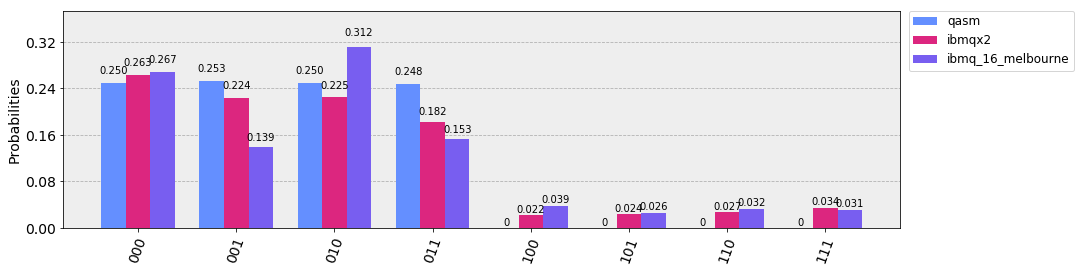

In [25]:
# EXECUTING THE CIRCUIT
N_SHOTS = 2**(13);

BACKEND_NAME = "ibmq_qasm_simulator"; DADOS_qasm   = SIMULADOR_REMOTO(QCteleport, N_SHOTS, BACKEND_NAME);
BACKEND_NAME = "ibmqx2";              DADOS_ibmqx2 = SIMULADOR_REMOTO(QCteleport, N_SHOTS, BACKEND_NAME);
BACKEND_NAME = "ibmq_16_melbourne";   DADOS_melbourne = SIMULADOR_REMOTO(QCteleport, N_SHOTS, BACKEND_NAME);

# BACKEND_NAME = "ibmqx4";
# BACKEND_NAME = "ibmq_16_melbourne";

PLOT_HISTOGRAMS( [DADOS_qasm, DADOS_ibmqx2, DADOS_melbourne],  ['qasm', 'ibmqx2', 'ibmq_16_melbourne'] );